# Analyzing climate change effects on Madagascar

In this jupyter notebook, we aim to analyze the climate change effects on Madagascar through the following research questions:
- How have the significant climate trends in Madagascar affected the livelihood of the people in the country? This is including but not limited to: food security, population levels, and greenhouse gas emissions.


## Overview of datasets:
- First dataset (Climate change indicators): [https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-madagascar](https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-madagascar)
- Second dataset (Food security)- [https://data.world/wfp/9bd73ae5-0f0a-4f7d-a66c-9d7c4569cfcd](https://data.world/wfp/9bd73ae5-0f0a-4f7d-a66c-9d7c4569cfcd)
- Third dataset (Food security) - https://data.humdata.org/dataset/hrp-projects-mdg
- Fourth dataset (Environmental data) - https://data.humdata.org/dataset/world-bank-environment-indicators-for-madagascar

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
# Read in first dataset
climate_change_indicators = pd.read_csv("data/climate-change_mdg.csv")

climate_change_indicators["Year"] = climate_change_indicators["Year"].astype(int)
climate_change_indicators["Value"] = climate_change_indicators["Value"].astype(float)
climate_change_indicators.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Madagascar,MDG,2018,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
1,Madagascar,MDG,2017,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
2,Madagascar,MDG,2016,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
3,Madagascar,MDG,2015,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0
4,Madagascar,MDG,2014,Agricultural land (sq. km),AG.LND.AGRI.K2,408950.0


In [3]:
# Read in the second dataset about food security
food_security = pd.read_csv("data/food_security/pblstatssum-2.csv")
food_security["Mean"] = food_security["Mean"].astype(float)
food_security.head()

,SvyDate,ADM0_NAME,ADM1_NAME,ADM2_NAME,AdminStrata,Variable,VariableDescription,Demographic,Mean
0,2016-05-01T00:00:00,Madagascar,NaN,NaN,Analamanga,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.15652
1,2016-05-01T00:00:00,Madagascar,NaN,NaN,Androy,BorrowOrHelp,# of days household using this coping strategy...,NaN,2.34211
2,2016-05-01T00:00:00,Madagascar,NaN,NaN,Anosy,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.75610
3,2016-05-01T00:00:00,Madagascar,NaN,NaN,Atsinanana,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.49296
4,2016-05-01T00:00:00,Madagascar,NaN,NaN,Analamanga,BorrowOrHelp>=1,prevalence-->equals to 1 if household uses thi...,NaN,0.44457


In [4]:
# Read in the third dataset
hrp_projects = pd.read_csv("data/hrp-projects.csv")
hrp_projects.head()

,name,versionCode,currentRequestedFunds,objective,partners,startDate,endDate,globalClusters,organizations,plans,Response plan code
0,#activity+name,#activity+code+v_hpc,#value+requested+usd,#description+objective,#org+impl+name+list,#date+start,#date+end,#sector+cluster+global+name,#org+prog+name,#response+plan+name,#response+plan+code
1,Support for the operational coordination of re...,FMDG22-CSS-183416-1,13333,Support for the operational coordination of re...,NaN,2022-01-01,2022-05-31,Coordination and support services,Office for the Coordination of Humanitarian Af...,Madagascar's Grand Sud Flash Appeal 2022,FMDG22
2,Strengthening of the monitoring and early warn...,FMDG22-CSS-183417-1,41250,Strengthening of the monitoring and early warn...,NaN,2022-01-01,2022-05-31,Coordination and support services,International Organization for Migration,Madagascar's Grand Sud Flash Appeal 2022,FMDG22
3,Provision of learning support provision to red...,FMDG22-EDU-183413-1,1712500,Provision of learning support to reduce the im...,NaN,2022-01-01,2022-05-31,Education,United Nations Children's Fund,Madagascar's Grand Sud Flash Appeal 2022,FMDG22
4,"Emergency cash food assistance for 25,000 bene...",FMDG22-FSC-183390-1,541667,"Emergency cash food assistance for 25,000 bene...",NaN,2022-01-01,2022-05-31,Food Security,Save the Children,Madagascar's Grand Sud Flash Appeal 2022,FMDG22


In [5]:
# Read in the fourth dataset
environmental_data = pd.read_csv("data/environment_mdg.csv")
environmental_data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Madagascar,MDG,2018,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321
2,Madagascar,MDG,2017,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321
3,Madagascar,MDG,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321
4,Madagascar,MDG,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,70.2904778274321


# Other datasets and factors
From the links, [https://madagascar.opendataforafrica.org/tkkbtv/world-development-indicators-wdi-november-2014](https://madagascar.opendataforafrica.org/tkkbtv/world-development-indicators-wdi-november-2014) and [https://www.gbif.org/occurrence/search?country=MG](https://www.gbif.org/occurrence/search?country=MG), we can filter for different datasets based on Madagascar that we decide we want to use

# Analyzing the data

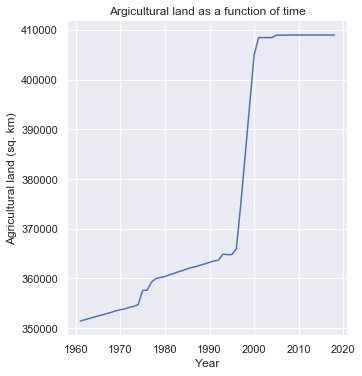

In [6]:
argi = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Agricultural land (sq. km)"]
graph = sns.relplot(data=argi, x="Year", y="Value", kind="line")
graph.set(ylabel="Agricultural land (sq. km)", title="Argicultural land as a function of time")

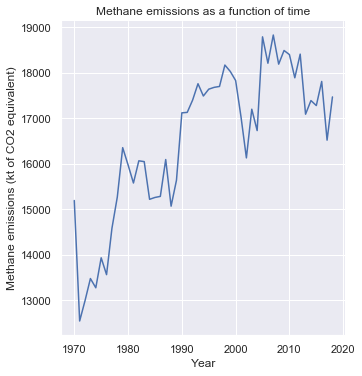

In [7]:
#Methane emissions (kt of CO2 equivalent)
methane_emission = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Methane emissions (kt of CO2 equivalent)"]
graph = sns.relplot(data=methane_emission, x="Year", y="Value", kind="line")
graph.set(ylabel="Methane emissions (kt of CO2 equivalent)", title="Methane emissions as a function of time")

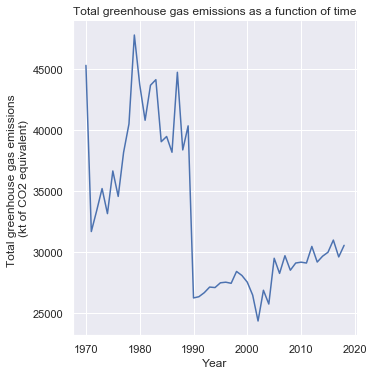

In [8]:
#Total greenhouse gas emissions (kt of CO2 equivalent)
greenhouse_gas = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Total greenhouse gas emissions (kt of CO2 equivalent)"]
graph = sns.relplot(data=greenhouse_gas, x="Year", y="Value", kind="line")
graph.set(ylabel="Total greenhouse gas emissions \n(kt of CO2 equivalent)", title="Total greenhouse gas emissions as a function of time")

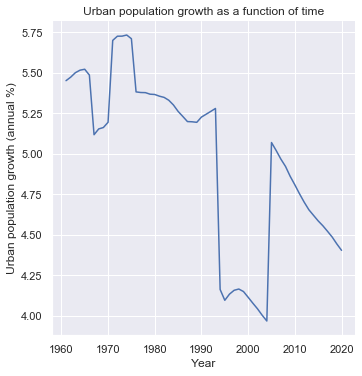

In [9]:
#Urban population growth
urb_pop = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Urban population growth (annual %)"]
graph = sns.relplot(data=urb_pop, x="Year", y="Value", kind="line")
graph.set(ylabel="Urban population growth (annual %)", title="Urban population growth as a function of time")

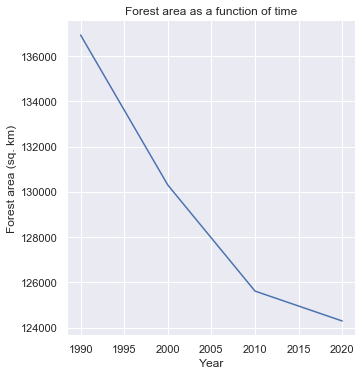

In [10]:
forest_area = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Forest area (sq. km)"]
graph = sns.relplot(data=forest_area, x="Year", y="Value", kind="line")
graph.set(ylabel="Forest area (sq. km)", title="Forest area as a function of time")

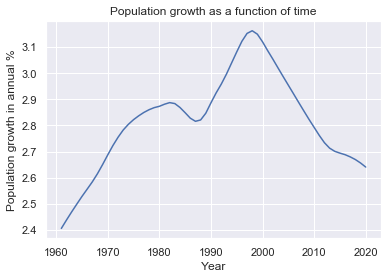

In [15]:
population_growth = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Population growth (annual %)"]

plt.plot(population_growth["Year"], population_growth["Value"])
plt.xlabel("Year")
plt.ylabel("Population growth in annual %")
plt.title("Population growth as a function of time")
plt.show()

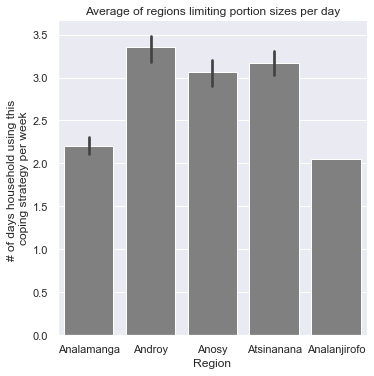

In [12]:
limited_portion_size = food_security[(food_security["Variable"]=="LimitPortionSize")]
graph = sns.catplot(x="AdminStrata", y="Mean", kind="bar", data=limited_portion_size, color="gray")
graph.set(ylabel="# of days household using this \ncoping strategy per week", xlabel="Region", title="Average of regions limiting portion sizes per day")

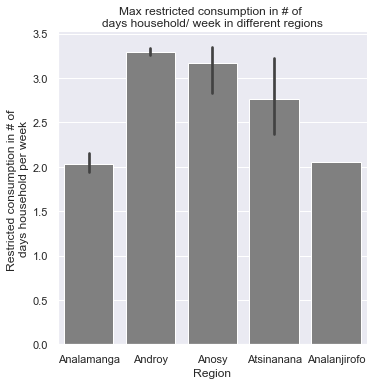

In [13]:
restrict_consumption = food_security[food_security["Variable"]=="RestrictConsumption"]

graph = sns.catplot(x="AdminStrata", y="Mean", kind="bar", data=restrict_consumption, color="gray")
graph.set(ylabel="Restricted consumption in # of \ndays household per week", xlabel="Region", title="Max restricted consumption in # of \ndays household/ week in different regions")